In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Load the two CSV files for 10-fold cross-validation results
df_10_8 = pd.read_csv("10.8.csv")
df_10_16 = pd.read_csv("10.16.csv")

# Display basic info and head of each to understand structure
df_10_8_info = df_10_8.info()
df_10_8_head = df_10_8.head()

df_10_16_info = df_10_16.info()
df_10_16_head = df_10_16.head()

df_10_8_info, df_10_8_head, df_10_16_info, df_10_16_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_name            58 non-null     object 
 1   learning_rate       58 non-null     float64
 2   epochs              58 non-null     int64  
 3   batch_size          58 non-null     int64  
 4   hidden_size         58 non-null     int64  
 5   num_layers          58 non-null     int64  
 6   bidirectional       58 non-null     bool   
 7   avg_train_loss      58 non-null     float64
 8   avg_val_loss        58 non-null     float64
 9   avg_mask2_coverage  58 non-null     float64
 10  avg_mask2_accuracy  58 non-null     float64
dtypes: bool(1), float64(5), int64(4), object(1)
memory usage: 4.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              ------------

(None,
   job_name  learning_rate  epochs  batch_size  hidden_size  num_layers  \
 0    job_1          0.001      40           8           64           1   
 1    job_2          0.001      40           8           64           1   
 2    job_3          0.001      40           8           64           2   
 3    job_4          0.001      40           8           64           2   
 4    job_5          0.001      40           8           64           3   
 
    bidirectional  avg_train_loss  avg_val_loss  avg_mask2_coverage  \
 0           True        0.464164      0.407678            0.629867   
 1          False        0.645685      0.732286            0.296099   
 2           True        0.380669      0.439495            0.604732   
 3          False        0.644668      0.562562            0.367615   
 4           True        0.445917      0.423837            0.646667   
 
    avg_mask2_accuracy  
 0            0.697650  
 1            0.352964  
 2            0.670735  
 3           

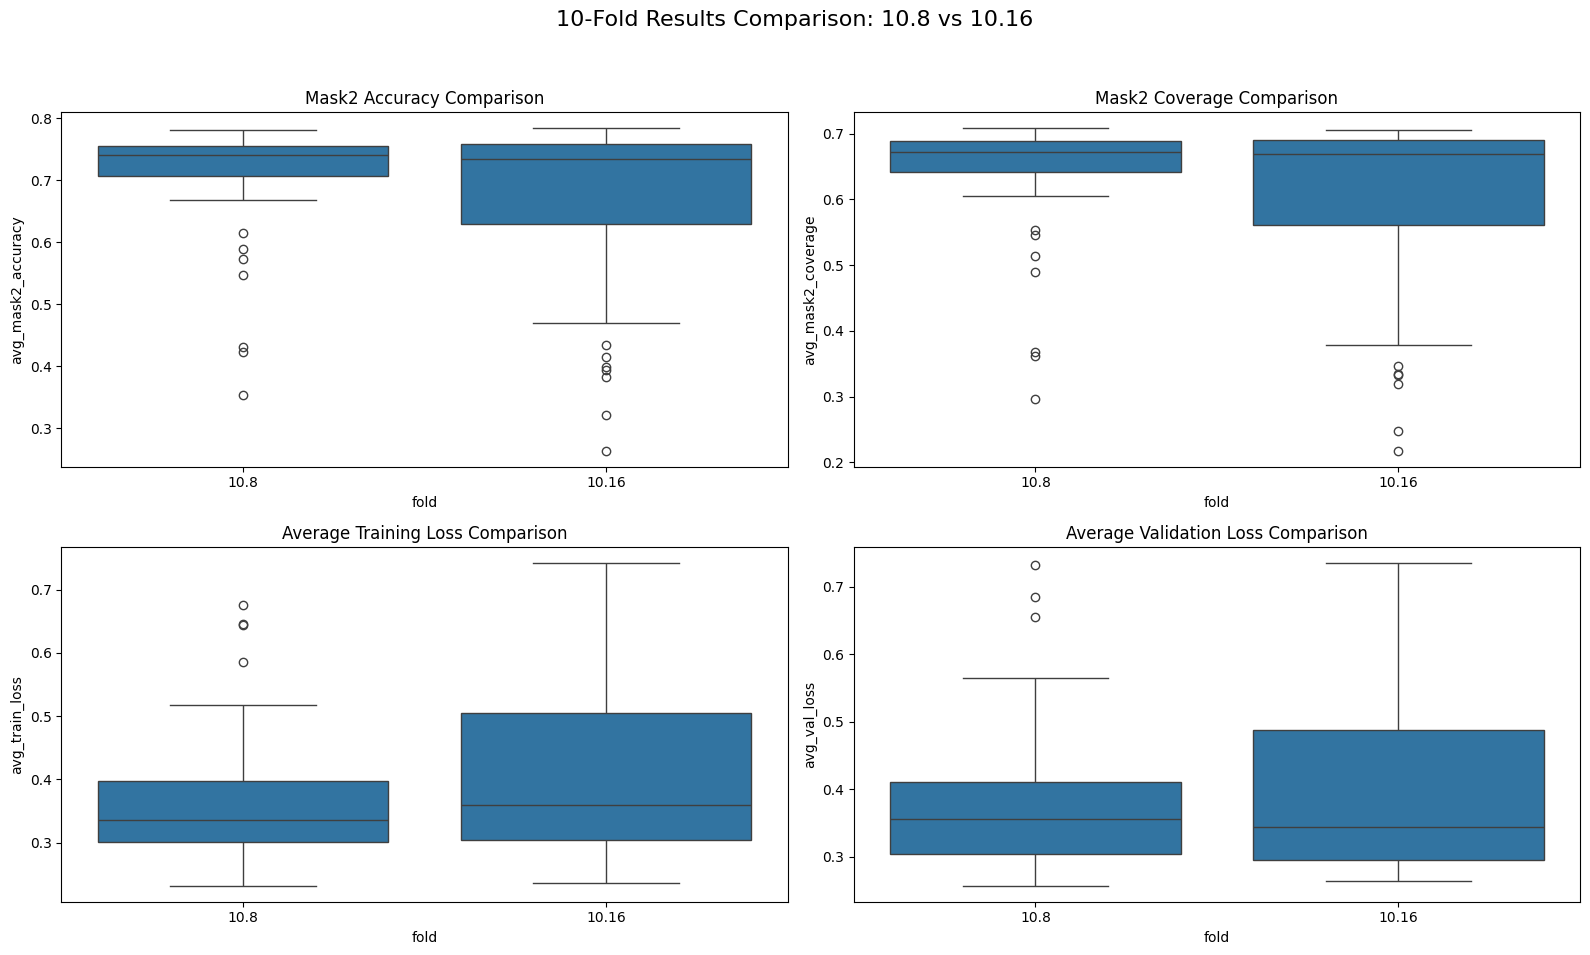

In [3]:
# Combine both datasets with an extra column to indicate the fold
df_10_8['fold'] = '10.8'
df_10_16['fold'] = '10.16'
df_combined = pd.concat([df_10_8, df_10_16], ignore_index=True)

# Create comparison charts
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('10-Fold Results Comparison: 10.8 vs 10.16', fontsize=16)

# Accuracy
sns.boxplot(data=df_combined, x='fold', y='avg_mask2_accuracy', ax=axes[0, 0])
axes[0, 0].set_title('Mask2 Accuracy Comparison')

# Coverage
sns.boxplot(data=df_combined, x='fold', y='avg_mask2_coverage', ax=axes[0, 1])
axes[0, 1].set_title('Mask2 Coverage Comparison')

# Training Loss
sns.boxplot(data=df_combined, x='fold', y='avg_train_loss', ax=axes[1, 0])
axes[1, 0].set_title('Average Training Loss Comparison')

# Validation Loss
sns.boxplot(data=df_combined, x='fold', y='avg_val_loss', ax=axes[1, 1])
axes[1, 1].set_title('Average Validation Loss Comparison')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

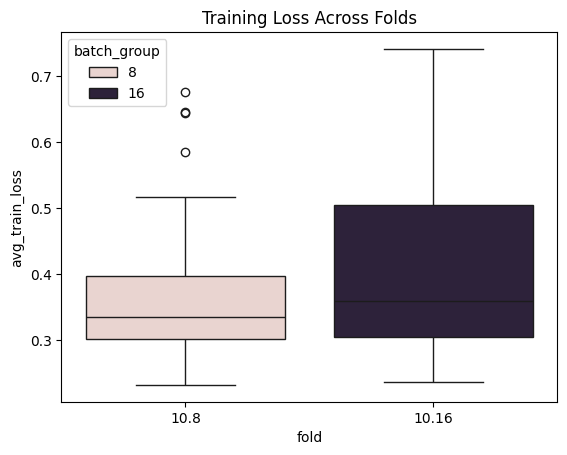

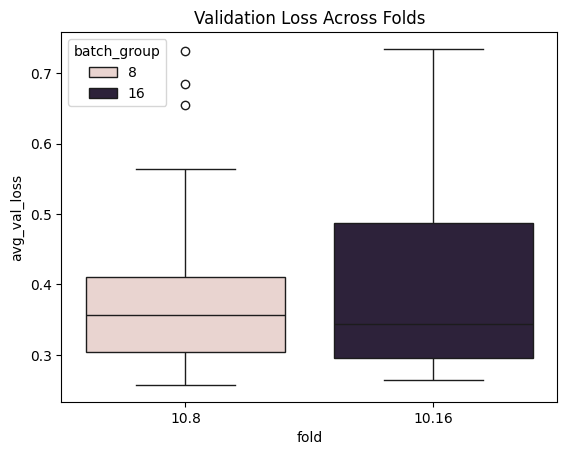

In [ ]:
# Compare train vs val loss
sns.boxplot(data=df_combined, x='fold', y='avg_train_loss', hue='batch_group')
plt.title("Training Loss Across Folds")
plt.show()

sns.boxplot(data=df_combined, x='fold', y='avg_val_loss', hue='batch_group')
plt.title("Validation Loss Across Folds")
plt.show()

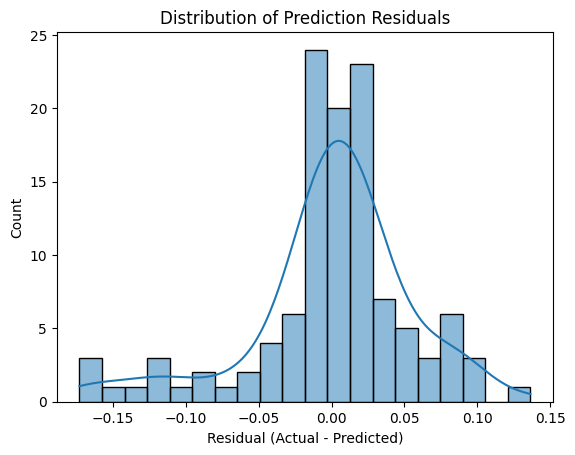

In [ ]:
# Residuals = actual - predicted
df_combined['predicted'] = rf_model.predict(X)
df_combined['residual'] = df_combined['avg_mask2_accuracy'] - \
    df_combined['predicted']

sns.histplot(df_combined['residual'], bins=20, kde=True)
plt.title("Distribution of Prediction Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.show()

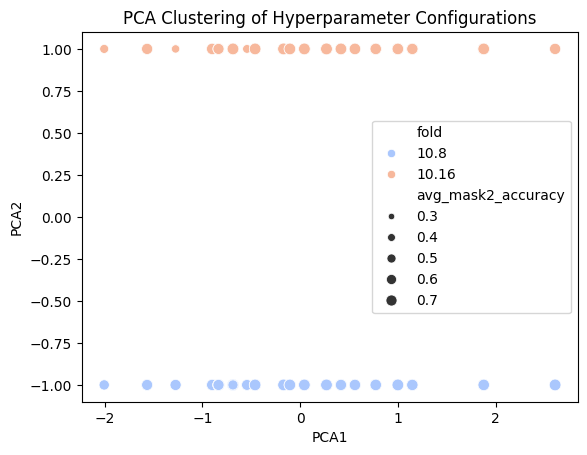

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df_combined['PCA1'], df_combined['PCA2'] = components[:, 0], components[:, 1]

sns.scatterplot(data=df_combined, x='PCA1', y='PCA2', hue='fold',
                size='avg_mask2_accuracy', palette='coolwarm')
plt.title("PCA Clustering of Hyperparameter Configurations")
plt.show()

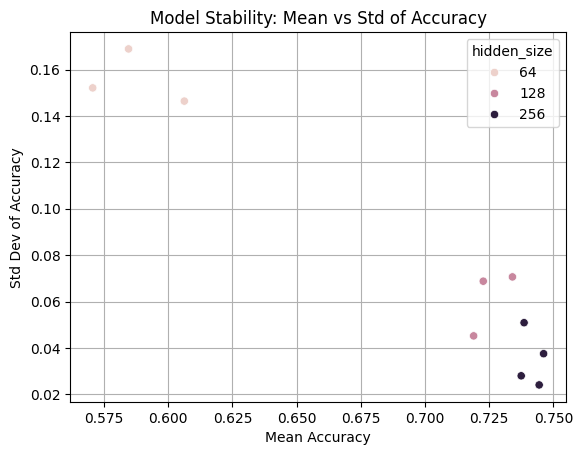

In [ ]:
# Simulated repeated measures if multiple jobs per setting exist
stability = df_combined.groupby(['hidden_size', 'num_layers'])[
    'avg_mask2_accuracy'].agg(['mean', 'std']).reset_index()

sns.scatterplot(data=stability, x='mean', y='std', hue='hidden_size')
plt.title("Model Stability: Mean vs Std of Accuracy")
plt.xlabel("Mean Accuracy")
plt.ylabel("Std Dev of Accuracy")
plt.grid(True)
plt.show()

In [ ]:
!pip install shap

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   --------------- ------------------------ 1.0/2.6 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------  2.6/2.6 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   - -------------------------------------- 1.3/28.1 MB 5.6 MB/s eta 0:00:05
   --- ------------------------------------ 2.4/28.1 MB 5.4 MB/s eta 0:00:05
   ---- ----------------------------------- 3.4/28.1 MB 5.4 MB/s eta 0:00:05
   ------- -------------------------------- 5.0/28.1 MB 5.8 MB/s eta 0:00:04
   -------- ------------------------------- 6.3/28.1 MB 5.8 MB/s eta 0:00:04
   ----------- ---------------------------- 7.9/28.1 MB 6.1 MB/s eta 0:00:04
   ------------- -------------------------- 9.4/28.1 MB 6.2 MB/s eta 0:00:03
   --------------- ------------------------ 10.7/28.1 MB 6.3 MB/s eta 0:00:03
   -------------

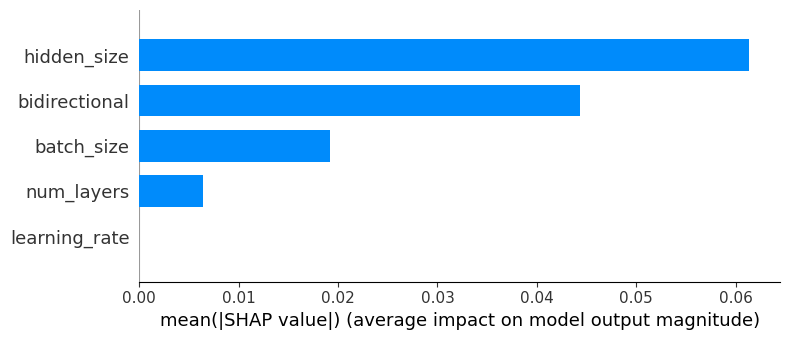

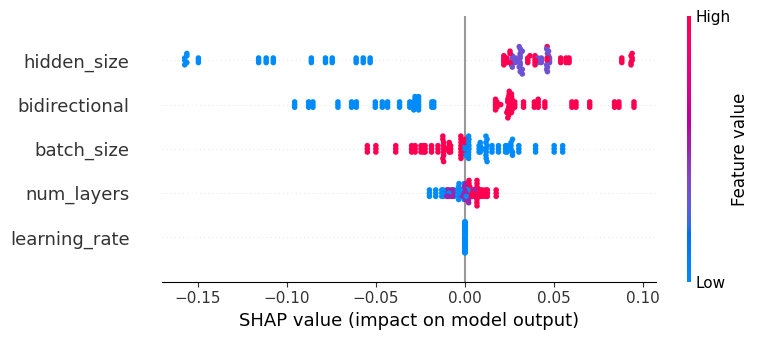

In [ ]:
import shap
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)

# Summary Plot
shap.summary_plot(shap_values, X, plot_type="bar")

# Optional: Dependence plot for top feature
shap.summary_plot(shap_values, X)